In [1]:
import numpy as np
from scipy.special import hankel1, roots_hermitenorm, roots_chebyt
import matplotlib.pyplot as plt

In [2]:
ValorTeorico=0.69247699620405105797219086532549115 - 0.72131043233017755094937790855952844j  

def U(x,y,theta = 0, U0 = 1, k = 512,sigma = 1):
    x,y = x*np.cos(theta)-y*np.sin(theta),y*np.cos(theta)+x*np.sin(theta)
    return U0*np.exp(1j*k*x-(y**2)/(2*sigma**2))

def Integranda(x,y,xs,ys,theta=0,U0 = 1,k1 = 512,sigma = 1,k2 = 512):
    return k2/2*U(xs,ys,theta,U0,k1,sigma)*hankel1(0,np.sqrt((x-xs)**2+np.subtract.outer(y,ys)**2)*k2)


def plotComplexfunc(a,b,N,f,nome=['Parte Real','Parte Imaginária','Valor Absoluto'],ax=[plt,plt,plt],c=["c","r","g"],title = ["","",""]):
    X = np.linspace(a,b,N)
    Y = f(X)
    ax[0].plot(X,Y.real,label=nome[0],color = c[0])
    ax[1].plot(X,Y.imag,label=nome[1],color = c[1])
    ax[2].plot(X,abs(Y),label=nome[2],color = c[2])

    ax[ 0 ].legend()
    ax[ 0 ].set_title(title[ 0 ])
    ax[ 1 ].legend()
    ax[ 1 ].set_title(title[ 1 ])
    ax[ 2 ].legend()
    ax[ 2 ].set_title(title[ 2 ])

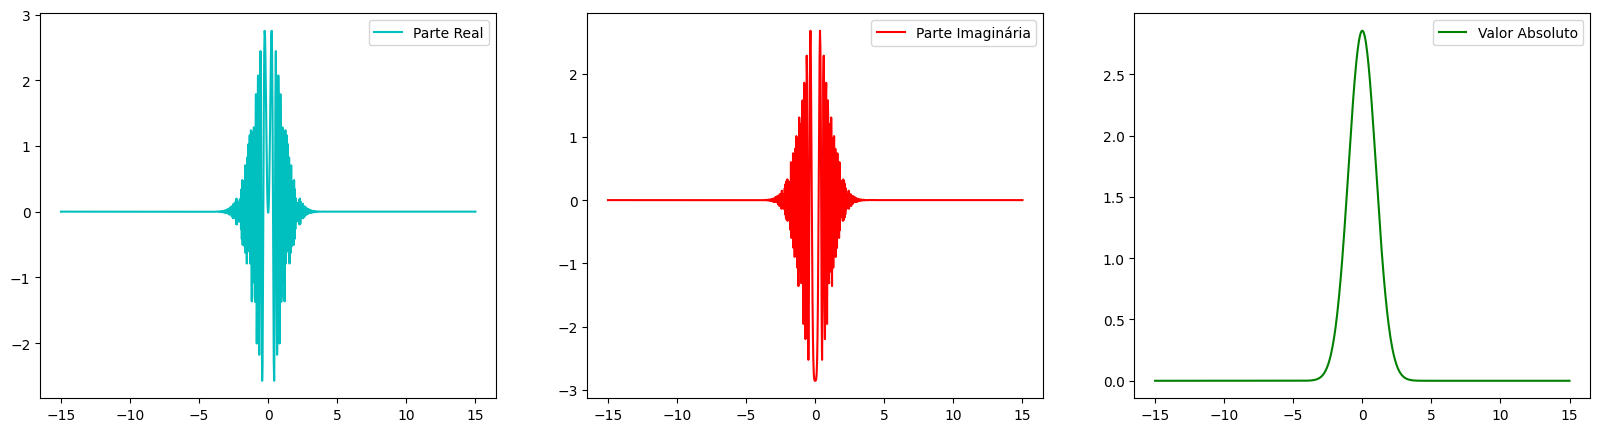

In [3]:
#1.1
fig1, axs1 = plt.subplots(1,3,figsize=(20,5))
plotComplexfunc(-15,15,1000,lambda y : Integranda(10,0,0,y),ax=axs1)
plt.show()

In [4]:
#1.2
def Simpson(a,b,N,f,vt = ValorTeorico,reterror=0):
    N = np.array((N),int)
    n = N.size
    N = np.zeros((n),int) + N
    E = np.zeros((n))
    I = np.zeros((n),dtype=complex)
    for i in range(n):
        if N[i] % 2 == 0:
            t, h = np.linspace(a,b,N[i]+1,retstep=1)
        else: 
            t, h = np.linspace(a,b,N[i],retstep=1)
        Y = f(t)
        I[i] = np.sum(Y[:-2:2]+4*Y[1:-1:2]+Y[2::2])*h/3

    E = abs(I-vt)
    if reterror:
        return I, E
    else:
        return I


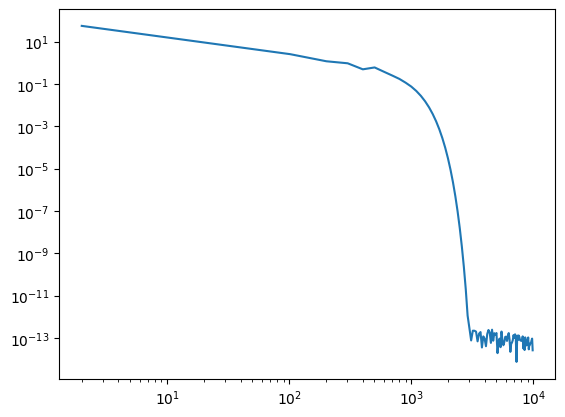

In [5]:
N = np.arange(2,10**4,100)
Erros = Simpson(-15,15,N,lambda ys : Integranda(10,0,0,ys),reterror=1)[1]
plt.plot(N,Erros)
plt.xscale("log")
plt.yscale('log')
plt.show()


In [6]:
#1.3
def RombergTable(a,b,emin,f,vt = ValorTeorico,retPoints=0,retError=0):
    h = (b-a)
    N = int(np.log(h/emin))
    E = np.zeros((N,N))
    Points = np.zeros(N)
    R = np.zeros((N,N),dtype=complex)
    R[0, 0] = ((f(a)+f(b))*h)/2
    E[0,0] = abs(R[0,0] - vt)
    Points[0] = 1
    n = 1
    i = 1
    while E[i-1,i-1] > emin:
        Points[i] = 2*n+1
        t,h = np.linspace(a,b,int(Points[i]),retstep=1)
        R[i, 0] = R[i-1, 0] / 2 + np.sum(f(t[1:-1:2]))*h
        for m in range(i):
            R[i, m+1] = R[i, m] + (R[i, m]-R[i-1, m])/(4**(m+1) - 1)
        E[i,:] = abs(R[i,:]-vt)
        i += 1
        n *= 2
    R = np.trim_zeros(np.diagonal(R))
    Points = np.trim_zeros(Points)
    if not(retPoints or retError):
        return R
    if retPoints and not(retError):
        return R, Points
    if retError and not(retPoints):
        return R, E
    if retPoints and retError:
        return R, Points, E

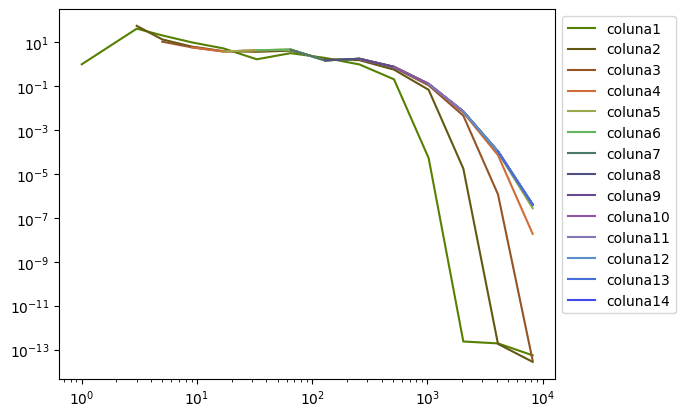

In [7]:
fig,ax = plt.subplots()
Points, E = RombergTable(-15,15,10**-5,lambda ys : Integranda(10,0,0,ys),retPoints=1,retError=1)[1:]
for i in range(Points.size):
    ax.plot(Points[i:],E[i:,i], label="coluna"+str(i+1),color = (1/abs(i/Points.size+np.cos(i)+2),1/abs(i/Points.size+np.sin(i)+2),i/Points.size))
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [8]:
#1.4
def GaussHermite(N,f):
    x,w = roots_hermitenorm(N)
    return np.inner(f(x),w)

def IntegrandaHermite(x,y,xs,ys,U0 = 1,k = 512):
    return k/2*U0*hankel1(0,np.sqrt((x-xs)**2+(y-ys)**2)*k)

In [9]:
GaussHermite(100000,lambda ys : IntegrandaHermite(10,0,0,ys))

(0.6924769962041082-0.7213104323338226j)

In [10]:
#1.5
def GaussChebyshev(a,b,N,f):
    x,w = roots_chebyt(N)
    X = (b-a)/2*x-(b+a)/2
    W = (b-a)/2*w*np.sqrt(1-x**2)
    return np.inner(f(X),W)


In [11]:
GaussChebyshev(-15,15,10000, lambda ys : Integranda(10,0,0,ys))

(0.6924769962040054-0.721310432330017j)

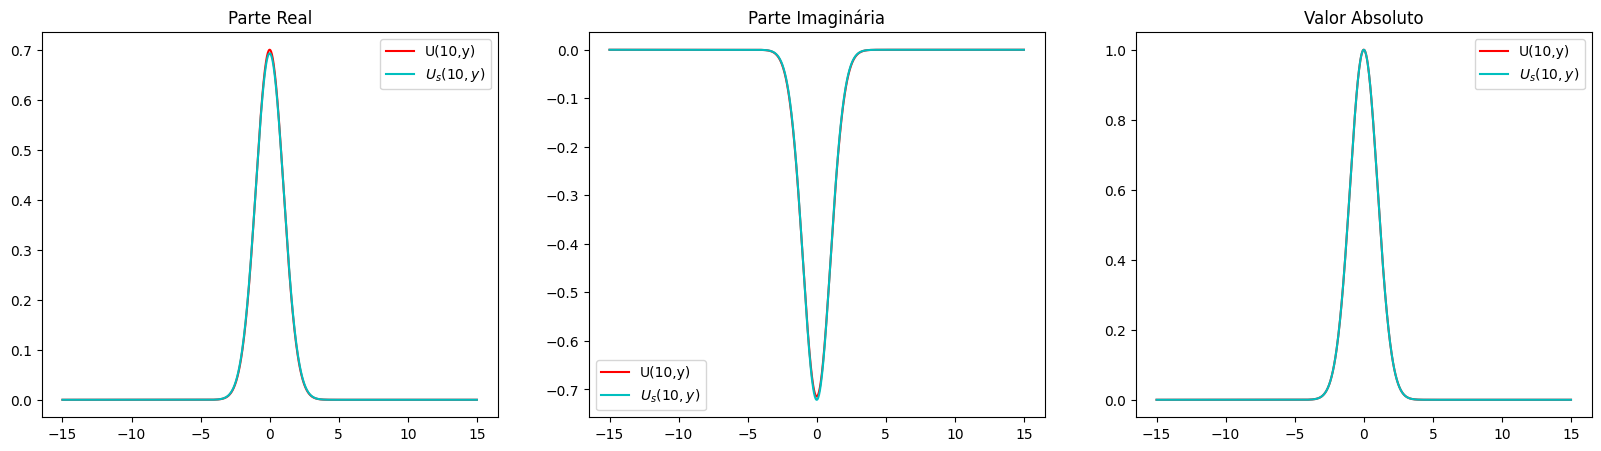

In [12]:
#1.6
fig2,axs2 = plt.subplots(1,3,figsize=(20,5))
t = np.linspace(-15,15,1000)
ImagemU = U(10,t)
axs2[0].plot(t,ImagemU.real,label ="U(10,y)",c = "r")
axs2[1].plot(t,ImagemU.imag,label ="U(10,y)",c = "r")
axs2[2].plot(t,abs(ImagemU),label ="U(10,y)",c = "r")

plotComplexfunc(-15,15,1000,lambda y: GaussChebyshev(-15,15, 10000, lambda ys: Integranda(10,y,0,ys)),["$U_s(10,y)$","$U_s(10,y)$","$U_s(10,y)$"],axs2, ["c","c","c"], ["Parte Real","Parte Imaginária", "Valor Absoluto"])

plt.show()

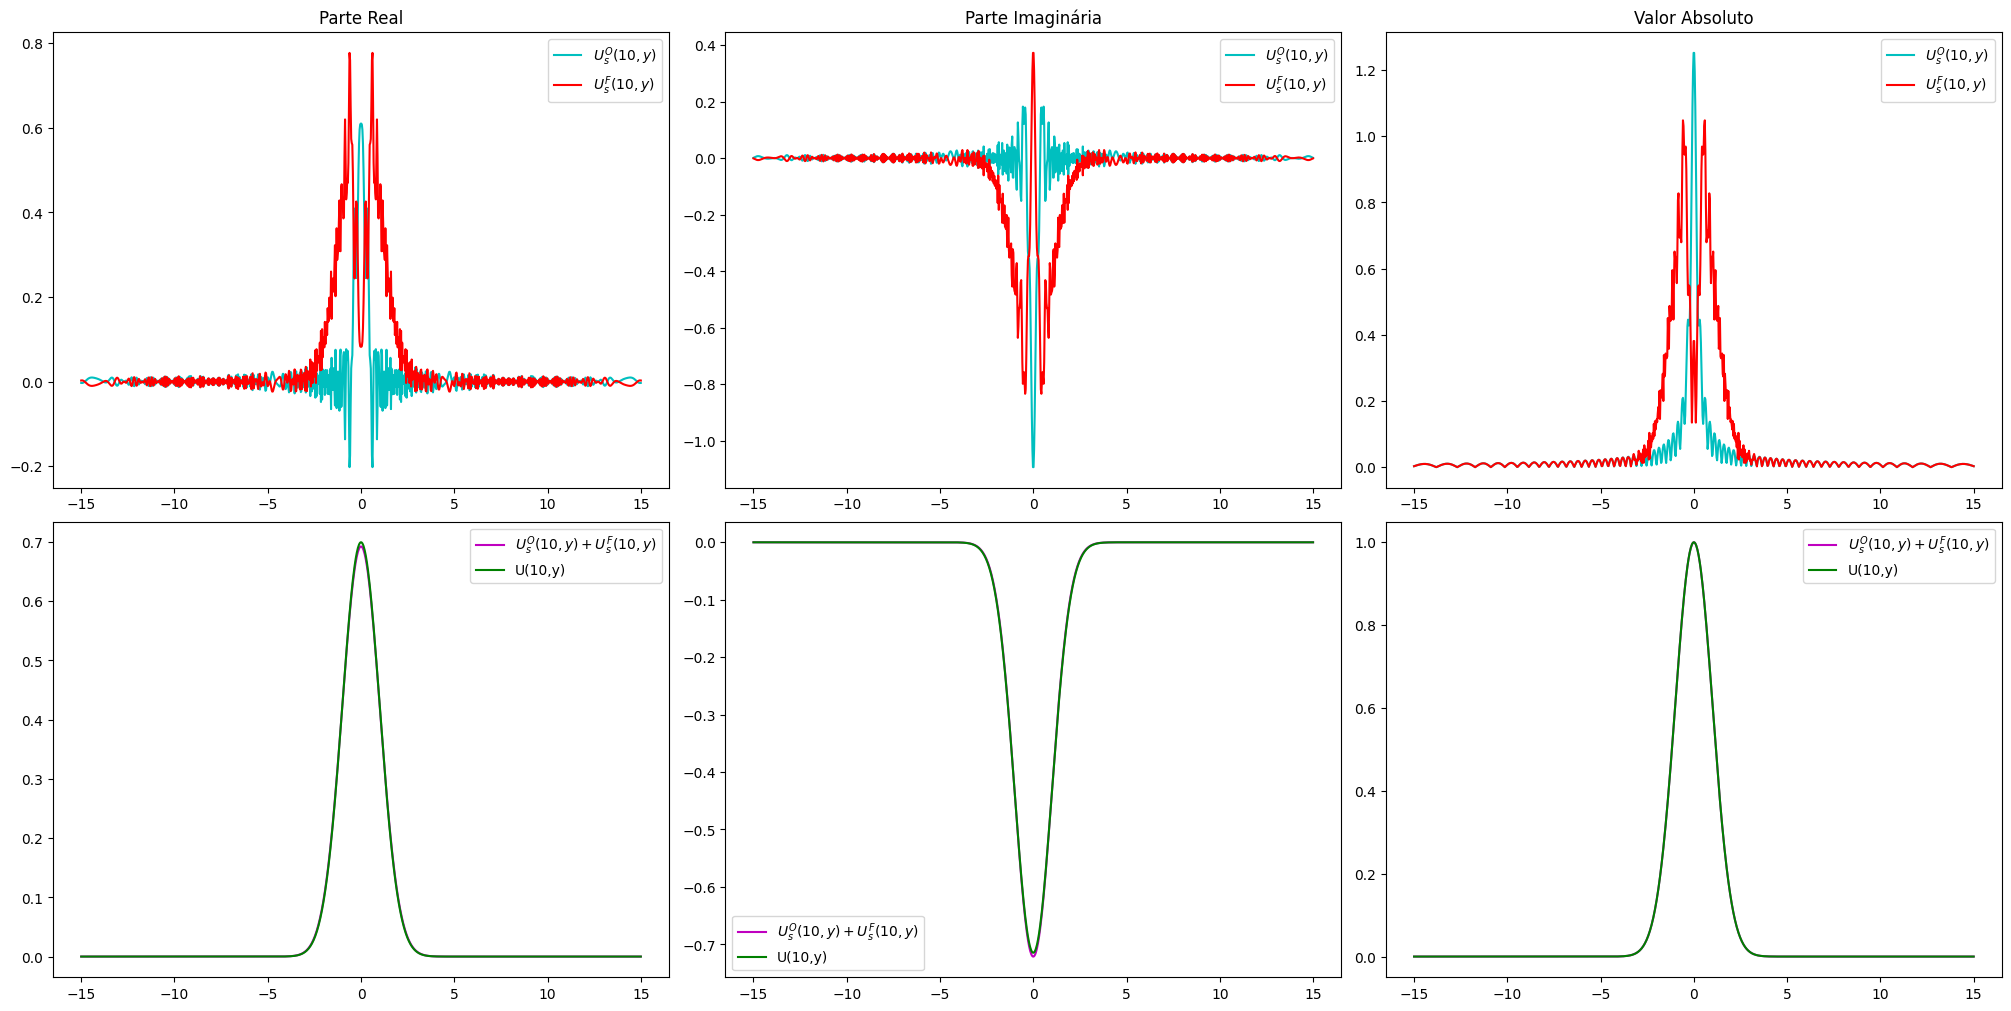

In [13]:
#2.1+2.2+2.3+2.4
ImagemUO = GaussChebyshev(-0.25,0.25, 10000, lambda ys: Integranda(10,t,0,ys))
ImagemUF = GaussChebyshev(-15,-0.25, 10000, lambda ys: Integranda(10,t,0,ys))+GaussChebyshev(0.25, 15, 10000, lambda ys: Integranda(10,t,0,ys))
ImagemSoma = ImagemUO + ImagemUF
fig3, axs3 = plt.subplots(2,3,figsize=(20,10),layout='constrained')

axs3[0,0].plot(t,ImagemUO.real, label = "$U^O_s(10,y)$",c = "c")
axs3[0,1].plot(t,ImagemUO.imag, label = "$U^O_s(10,y)$",c = "c")
axs3[0,2].plot(t,abs(ImagemUO), label = "$U^O_s(10,y)$",c = "c")

axs3[0,0].plot(t,ImagemUF.real, label = "$U^F_s(10,y)$",c = "r")
axs3[0,1].plot(t,ImagemUF.imag, label = "$U^F_s(10,y)$",c = "r")
axs3[0,2].plot(t,abs(ImagemUF), label = "$U^F_s(10,y)$",c = "r")

axs3[1,0].plot(t,ImagemSoma.real, label = "$U^O_s(10,y)+U^F_s(10,y)$",c = "m")
axs3[1,1].plot(t,ImagemSoma.imag, label = "$U^O_s(10,y)+U^F_s(10,y)$",c = "m")
axs3[1,2].plot(t,abs(ImagemSoma), label = "$U^O_s(10,y)+U^F_s(10,y)$",c = "m")

axs3[1,0].plot(t,ImagemU.real,label ="U(10,y)",c = "g")
axs3[1,1].plot(t,ImagemU.imag,label ="U(10,y)",c = "g")
axs3[1,2].plot(t,abs(ImagemU),label ="U(10,y)",c = "g")

axs3[0,0].legend()
axs3[0,1].legend()
axs3[0,2].legend()
axs3[1,0].legend()
axs3[1,1].legend()
axs3[1,2].legend()

axs3[0,0].set_title('Parte Real')
axs3[0,1].set_title('Parte Imaginária')
axs3[0,2].set_title('Valor Absoluto')

plt.show()

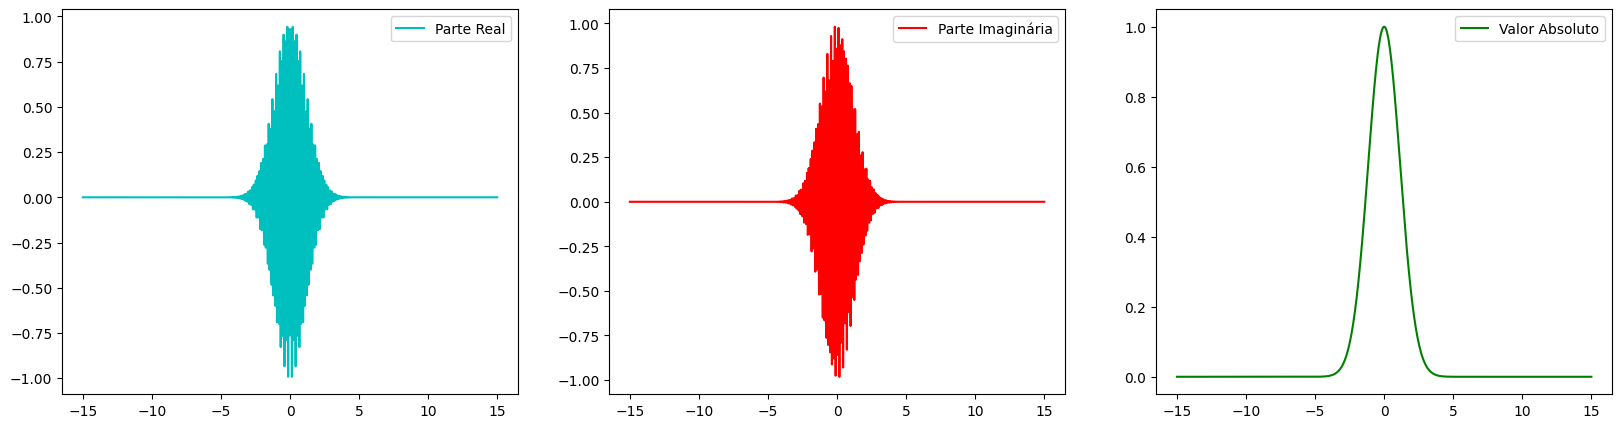

In [14]:
#3.1
fig4,axs4 = plt.subplots(1,3,figsize=(20,5))

plotComplexfunc(-15,15,1000,lambda y: U(0,y,-np.pi/6),ax=axs4)
plt.show()

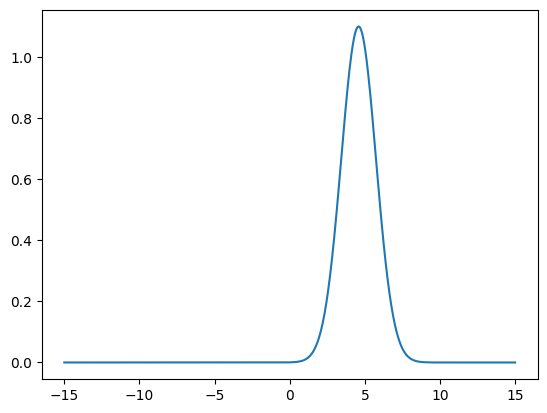

1.2008473672182538


In [15]:
#3.2
ImagemUR = GaussChebyshev(-15,15, 10000, lambda ys: Integranda(10,t,0,ys,-np.pi/6,k2=1.2*512))
plt.plot(t,abs(ImagemUR))
plt.show()
print(np.sin(np.pi/6)/np.sin(np.arctan(t[np.argmax(abs(ImagemUR))]/10)))

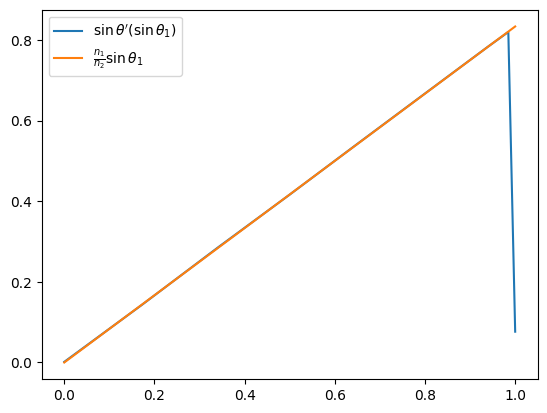

In [16]:
#3.3

theta1 = np.linspace(-np.pi/2,0,10)
theta2 = np.zeros_like(theta1)
for i in range(theta1.size):
    ImagemTheta = GaussChebyshev(-15,15, 10000, lambda ys: Integranda(10,t,0,ys,theta1[i],k2=1.2*512))
    theta2[i] = np.arctan(t[np.argmax(abs(ImagemTheta))]/10)
fig5, ax5 = plt.subplots()

X = -np.sin(theta1)
ax5.plot(X,np.sin(theta2),label='$\sin{\\theta\'}(\sin{\\theta_1})$')
ax5.plot(X,X/1.2, label = "$\\frac{n_1}{n_2} \sin{\\theta_1}$")

ax5.legend()

plt.show()